<a href="https://colab.research.google.com/github/nielsleduc/sds-phd19/blob/master/Portfolio%20Tuesday%20-%20Niels%20le%20Duc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

for this portfolio to do 3 things:

## Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model



##Unsupervised ML

Prepare the dataset (select the columns that are useful)

In [0]:
import pandas as pd

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

In [0]:
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')
turnover.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [0]:
turnover_selected = turnover[['satisfaction','evaluation','number_of_projects','average_montly_hours','time_spend_company', 'work_accident', 'promotion', 'department', 'salary']]

In [0]:
sal = {'low' : 1, 'medium' : 2, 'high' : 3}
turnover_selected.replace({'salary' : sal}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [0]:
turnover_selected['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [0]:
dep = {'sales' : 0, 'accounting' : 2, 'hr' : 3, 'technical' : 4, 'support': 5, 'management': 6,
       'IT' : 7, 'product_mng' : 8, 'marketing' : 9, 'RandD' : 10}
turnover_selected.replace({'department' : dep}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


Preprocess (Scale)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
turnover_selected_scaled = scaler.fit_transform(turnover_selected)

In [0]:
pd.DataFrame(turnover_selected_scaled, columns=turnover_selected.columns).describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department,salary
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.103,-2.080,-1.463,-2.103,-1.026,-0.411,-0.147,-1.285,-0.933
25%,-0.695,-0.912,-0.652,-0.902,-0.341,-0.411,-0.147,-1.285,-0.933
50%,0.109,0.023,0.160,-0.021,-0.341,-0.411,-0.147,-0.020,0.636
75%,0.833,0.899,0.971,0.880,0.344,-0.411,-0.147,0.929,0.636
max,1.557,1.659,2.594,2.182,4.453,2.432,6.784,1.877,2.206


Reduce dimensionality and perhaps make a scatterplot of the data

In [0]:
from sklearn.decomposition import PCA

In [0]:
model = PCA()

In [0]:
model.fit(turnover_selected_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
data_reduced = model.transform(turnover_selected_scaled)
data_reduced.shape

(14999, 9)

Examine the reduced data

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

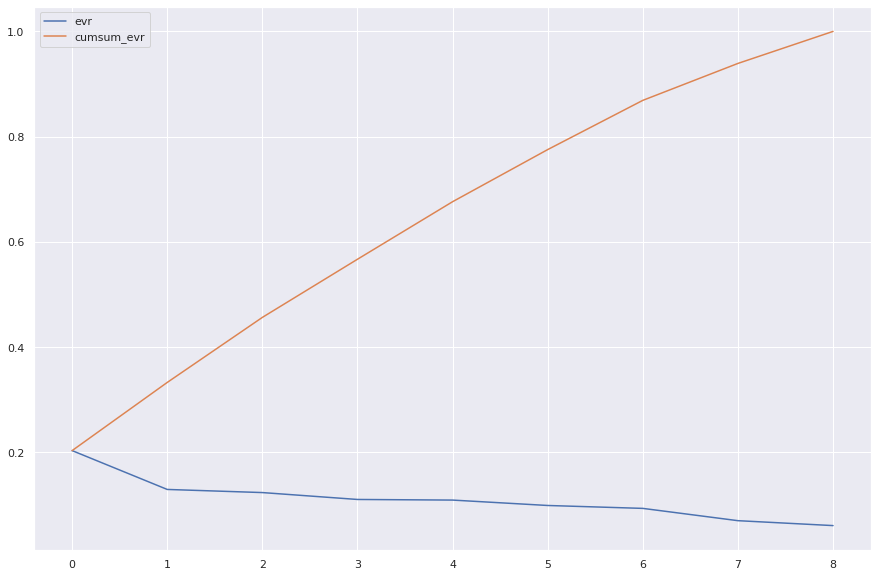

In [0]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

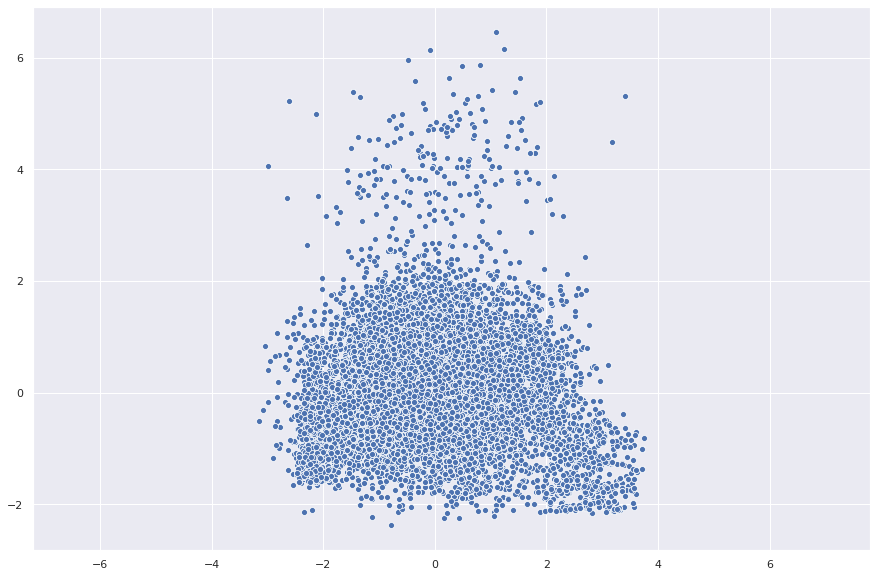

In [0]:
sns.scatterplot(x = data_reduced[:,0], y = data_reduced[:,1])
plt.axis('equal')
plt.show()

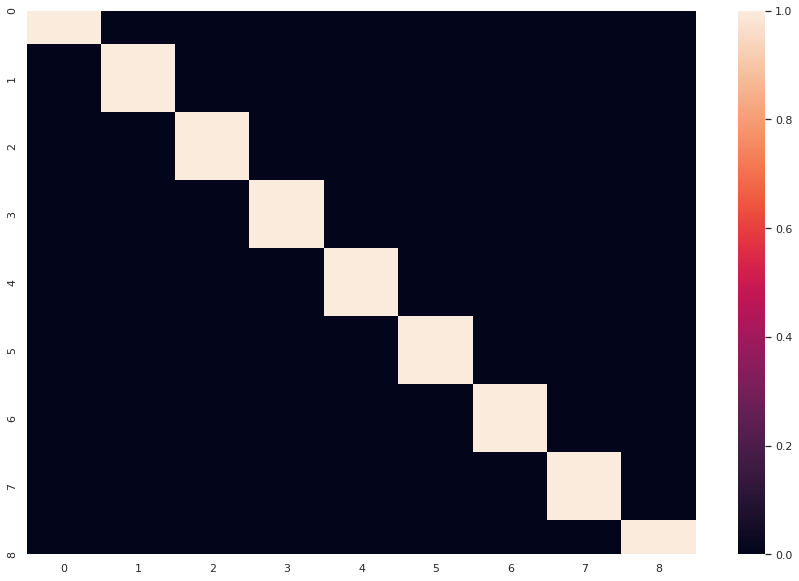

In [0]:
sns.heatmap(pd.DataFrame(data_reduced).corr())

##Supervised ML

Preprocess the data

In [0]:
turnover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [0]:
X = turnover.loc[:,'satisfaction':'work_accident']

In [0]:
y = turnover.churn
y.unique()

array([1, 0])

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [0]:
y_enc = encoder.fit_transform(y)

In [0]:
scaler = StandardScaler()

In [0]:
X_scaled = scaler.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

Try to predict "churn" using a simple model (Logistic Regression)

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.76666667 0.77666667 0.75958333 0.7725     0.76323468]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(model.score(X_test, y_test))

0.7566666666666667


In [0]:
from sklearn.metrics import classification_report

In [0]:
target_names = encoder.inverse_transform(list(set(y_test)))
y_pred = model.predict(X_test) 
print(classification_report(y_test, y_pred, target_names = target_names))

TypeError: ignored

Try a more advanced model (e.g. Random Forest)

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.9875     0.98666667 0.9875     0.99041667 0.98957899]
0.9876666666666667


Evaluate your model

In [0]:
target_names = encoder.inverse_transform(list(set(y_test))) 

y_pred = model.predict(X_test) 

print(classification_report(y_test, y_pred, target_names=target_names)) 

TypeError: ignored

Predict "satisfaction" (!!! This is a regression model)

In [0]:
y_reg = turnover.churn

NameError: ignored

In [0]:
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.2, random_state = 42)

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [0]:
model.fit(X_train, y_train)

In [0]:
print(model.score(X_test, y_test))

In [0]:
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

Evaluate the regression model

In [0]:
target_names = encoder.inverse_transform(list(set(y_test))) 

y_pred = model.predict(X_test) 

print(classification_report(y_test, y_pred, target_names=target_names))